# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Part 1

In [ ]:
LR=linear_model.LinearRegression()
price=df[['Price']]
mileage=df[['Mileage']]
LR.fit(mileage,price)
slope=LR.coef_[0]
intercept=LR.intercept_
print(f'y = {slope} * x + {intercept}')

y = [-0.1725205] * x + [24764.55900606]


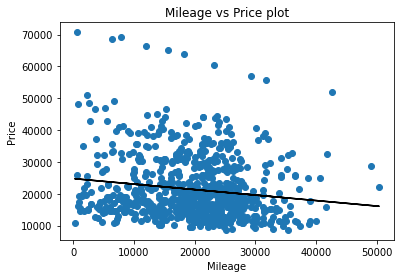

In [ ]:
plt.scatter(mileage,price)
pred_mileage=LR.predict(mileage)
plt.plot(mileage,pred_mileage,color='black')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price plot')
plt.show()

In [ ]:
mil_pr_r2=LR.score(mileage,price)
print('R2 score is :',mil_pr_r2)

R2 score is : 0.02046344732348926


Part 2


In [ ]:
df.columns
x_cols=df[['Mileage', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y_col=df['Price']
Lr1=linear_model.LinearRegression()
Lr1.fit(x_cols,y_col)
Lr1_slope=Lr1.coef_
Lr1_intercept=Lr1.intercept_
print(f'Equation y = {Lr1_slope} * x + ({Lr1_intercept})')


Equation y = [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] * x + (6758.755143598106)


In [ ]:
from itertools import combinations
cols=["Mileage", "Cylinder","Liter", "Doors", "Cruise", "Sound", "Leather"]
l1=[]
l2_r2=[]
for i in range(1,len(cols)+1):
  for elem in list(combinations(cols,i)):
    l1.append(elem)
    x_score=df[list(elem)]
    Lr2=linear_model.LinearRegression()
    Lr2.fit(x_score,y_col)
    r2_score_Lr2=Lr2.score(x_score,y_col)
    l2_r2.append(r2_score_Lr2)
df1=pd.DataFrame([l1,l2_r2])
df1=df1.T
df1.columns=['Combinations','R2_Score']
sort_value=df1.sort_values(by='R2_Score',ascending=False,ignore_index=True)
print(sort_value)
max_val=sort_value['R2_Score'].max()
res=sort_value[sort_value['R2_Score']==max_val]
res=res.values


                                          Combinations  R2_Score
0    (Mileage, Cylinder, Liter, Doors, Cruise, Soun...  0.446264
1    (Mileage, Cylinder, Doors, Cruise, Sound, Leat...  0.445691
2    (Mileage, Cylinder, Liter, Doors, Cruise, Leat...  0.437806
3          (Mileage, Cylinder, Doors, Cruise, Leather)   0.43694
4    (Mileage, Cylinder, Liter, Cruise, Sound, Leat...  0.430141
..                                                 ...       ...
122                                   (Mileage, Sound)  0.036881
123                                         (Leather,)  0.024711
124                                         (Mileage,)  0.020463
125                                           (Doors,)  0.019251
126                                           (Sound,)  0.015462

[127 rows x 2 columns]


In [ ]:
r2='{:.4f}'.format(res[0,1])


print(' ###################################### R2 Score #################################### \n\ncombination of ' +str(res[0,0])+ ' R2 Score is : '+str(r2))

 ###################################### R2 Score #################################### 

combination of ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') R2 Score is : 0.4463


In [ ]:
df6=pd.get_dummies(df,drop_first=True)
without_price=df6.drop(['Price'],axis=1)
df6_price=df6['Price']
LR7=linear_model.LinearRegression()
LR7.fit(without_price,df6_price)
LR7_R2_Score=LR7.score(without_price,df6_price)
print('Using dummies With all columns/features(except price) combination of the factors that is the best predictor for price \n\n R2 Score is :'+str(LR7_R2_Score))

Using dummies With all columns/features(except price) combination of the factors that is the best predictor for price 

 R2 Score is :0.9924082614213805


In [ ]:
df6=pd.get_dummies(df[['Make','Model','Type','Price']],drop_first=True)
without_price=df6.drop(['Price'],axis=1)
df6_price=df6['Price']
LR7=linear_model.LinearRegression()
LR7.fit(without_price,df6_price)
LR7_R2_Score=LR7.score(without_price,df6_price)
print('Using dummies with combination of [Make,Model,Type] \n\nR2 score is :'+str(LR7_R2_Score))

Using dummies with combination of [Make,Model,Type] 

R2 score is :0.958529993661883
